In [1]:
import pandas as pd
import numpy as np
import sys
import os
import io
import re
from sys import path
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
#from string import punctutation , digits
from IPython.core.display import display , HTML
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [2]:
import string

In [3]:
os.chdir('C:/Users/kmist/Desktop/sentiment-analysis')

In [4]:
#Amazon Data
amazon=pd.read_csv('amazon_cells_labelled.txt',delimiter='\t',header=None)
amazon.columns = ['Sentence','Class']

In [5]:
#Yelp Data
yelp=pd.read_csv('yelp_labelled.txt',delimiter='\t',header=None)
yelp.columns=['Sentence','Class']

In [6]:
#Imdb Data
imdb=pd.read_csv('imdb_labelled.txt',delimiter='\t',header=None)
imdb.columns=['Sentence','Class']

In [7]:
#Combine all the columns
data=pd.DataFrame()
data=pd.concat([amazon,yelp,imdb])
data['index']=data.index

   Class  COUNT
0      0    846
1      1    827


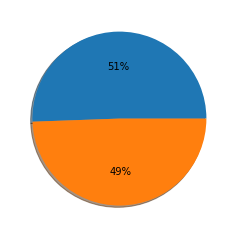

In [8]:
#Total Count of Each Category
pd.set_option('display.width', 4000)
pd.set_option('display.max_rows', 1000)
distOfDetails = data.groupby(by='Class', as_index=False).agg({'index': pd.Series.nunique}).sort_values(by='index', ascending=False)
distOfDetails.columns =['Class', 'COUNT']
print(distOfDetails)

#Distribution of All Categories
plt.pie(distOfDetails['COUNT'],autopct='%1.0f%%',shadow=True, startangle=360)
plt.show()

In [9]:
#Text Preprocessing
columns = ['index','Class', 'Sentence']
df_ = pd.DataFrame(columns=columns)

#lower string
data['Sentence'] = data['Sentence'].str.lower()

#remove email adress
data['Sentence'] = data['Sentence'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+', '', regex=True)

#remove IP address
data['Sentence'] = data['Sentence'].replace('((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}', '', regex=True)

#remove punctaitions and special chracters
data['Sentence'] = data['Sentence'].str.replace('[^\w\s]','')

#remove numbers
data['Sentence'] = data['Sentence'].replace('\d', '', regex=True)

#remove stop words
for index, row in data.iterrows():

    word_tokens = word_tokenize(row['Sentence'])

    filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')]

    df_ = df_.append({"index": row['index'], "Class":  row['Class'],"Sentence": " ".join(filtered_sentence[0:])}, ignore_index=True)

data = df_

In [10]:
data[0:10]

,index,Class,Sentence
0,0,0,way plug us unless go converter
1,1,1,good case excellent value
2,2,1,great jawbone
3,3,0,tied charger conversations lasting minutesmajo...
4,4,1,mic great
5,5,0,jiggle plug get line right get decent volume
6,6,0,several dozen several hundred contacts imagine...
7,7,1,razr owneryou must
8,8,0,needless say wasted money
9,9,0,waste money time


Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data['Sentence'].values.astype('U'),data['Class'].values.astype('int32'), test_size=0.10, random_state=0)
classes  = data['Class'].unique()

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

#grid search result

vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2') 
counts = vectorizer.fit_transform(X_train)
vocab = vectorizer.vocabulary_
classifier = SGDClassifier(alpha=1e-05,max_iter=50,penalty='elasticnet')
targets = y_train
classifier = classifier.fit(counts, targets)
example_counts = vectorizer.transform(X_test)
predictions = classifier.predict(example_counts)



C:\Users\kmist\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [13]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#Model Evaluation

acc = accuracy_score(y_test, predictions, normalize=True)
hit = precision_score(y_test, predictions, average=None,labels=classes)
capture = recall_score(y_test, predictions, average=None,labels=classes)

print('Model Accuracy:%.2f'%acc)
print(classification_report(y_test, predictions))

Model Accuracy:0.79
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       139
           1       0.80      0.78      0.79       136

   micro avg       0.79      0.79      0.79       275
   macro avg       0.79      0.79      0.79       275
weighted avg       0.79      0.79      0.79       275



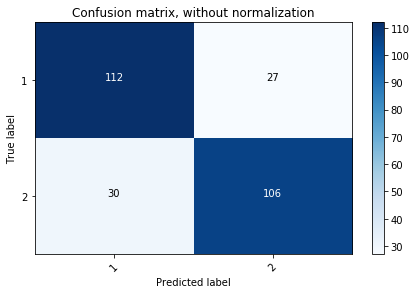

<Figure size 10800x7200 with 0 Axes>

In [14]:
import itertools
def plot_confusion_matrix(cm, classes,

                          normalize=False,

                          title='Confusion matrix',

                          cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        #print("Normalized confusion matrix")

    else:

        print()

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, format(cm[i, j], fmt),

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize=(150,100))

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, predictions,classes)
np.set_printoptions(precision=2)
class_names = range(1,classes.size+1)

# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
classInfo = pd.DataFrame(data=[])

for i in range(0,classes.size):

    classInfo = classInfo.append([[classes[i],i+1]],ignore_index=True)

classInfo.columns=['Category','Index']
